In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

from collections import Counter

#import warnings
#warnings.filterwarnings('ignore')

__Quick Tip:__ Code below can be used to check available plotting styles:
* plt.style.available

Titanic Dataset does not come in one part. There is __train.csv__ file containing data with __'Survived'__ column, which is our prediction target and __test.csv__ file doesn't contain that column. After predicting, a generated prediction array (y_hat) must be uploaded to related __kaggle competition page__ to learn to accuracy of results.

### Reading Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_df = train.copy()
test_df =  test.copy()

We need to save __'PassengerId'__ column for final submission.

In [3]:
test_passangerId = test_df['PassengerId']

### Exploring Data

In [4]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Bidois, Miss. Rosalie",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
#
#train_df.drop(['Cabin'], axis=1, inplace=True)
#train_df.columns

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Variable Description
1. __PassengerId:__Id of passengers
1. __Survived:__   1 if survived, 0 otherwise
1. __Pclass:__      1, 2 or 3: 1st, 2nd or 3rd class tickets. 1st class is the fancy one.
1. __Name:__        Name of passengers     
1. __Sex:__         Gender of passengers: Male or Female   
1. __Age:__         Age of passengers   
1. __SibSp:__       number of sibling or spouses on the ship.
1. __Parch:__       number of parents or children on the ship. 
1. __Ticket:__      Ticket number
1. __Fare:__        Amount of money paid to ticket
1. __Cabin:__       Nan if passenger had a cabin, other wise a cabin number 
1. __Embarked:__    S, C or Q: the port passengers embarked to ship from.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Some variables are not in proper types but we will deal with them later.
### Univariate Variable Analysis
#### Categorical Variables: 
* Survived, Sex, Pclass, Embarked, Ticket, SibSp, Parch, (Cabin is useless but we will deal with it later)

####  Numeric Variables:
* Fare, Age


### 1. Categorical Variables

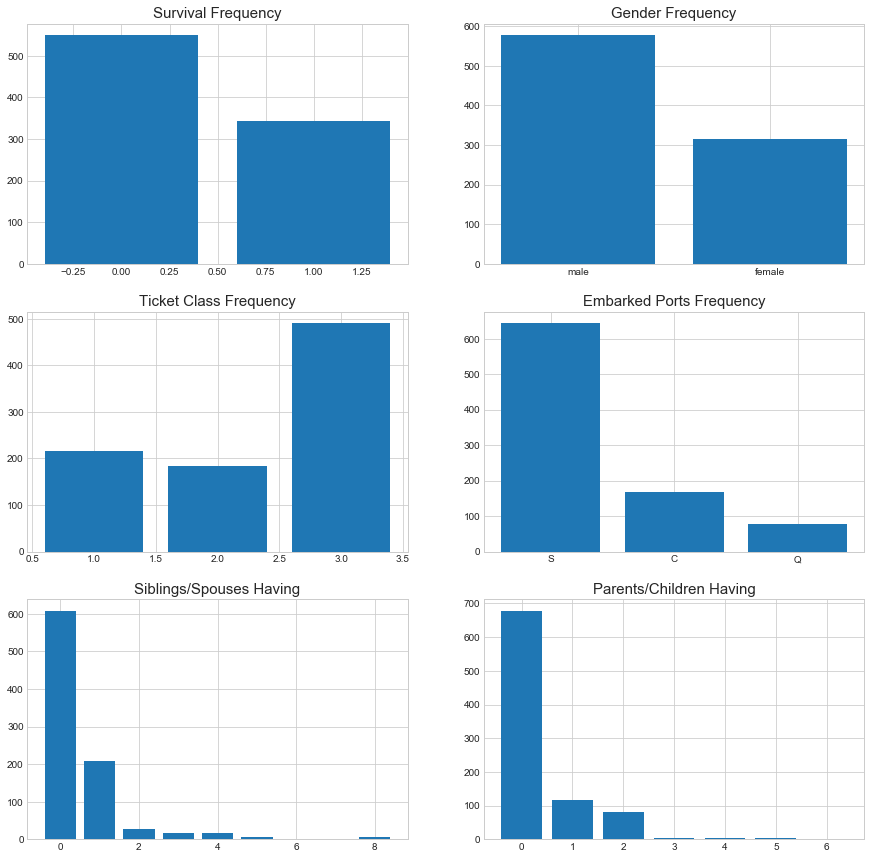

In [9]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize= (15,15))

ax1.bar(train_df['Survived'].value_counts().index, train_df['Survived'].value_counts().values)
ax1.set_title('Survival Frequency', fontsize=15)

ax2.bar(train_df['Sex'].value_counts().index, train_df['Sex'].value_counts().values)
ax2.set_title('Gender Frequency', fontsize=15)

ax3.bar(train_df['Pclass'].value_counts().index, train_df['Pclass'].value_counts().values)
ax3.set_title('Ticket Class Frequency', fontsize=15)

ax4.bar(train_df['Embarked'].value_counts().index, train_df['Embarked'].value_counts().values)
ax4.set_title('Embarked Ports Frequency', fontsize=15)

ax5.bar(train_df['SibSp'].value_counts().index, train_df['SibSp'].value_counts().values)
ax5.set_title('Siblings/Spouses Having', fontsize=15)

ax6.bar(train_df['Parch'].value_counts().index, train_df['Parch'].value_counts().values)
ax6.set_title('Parents/Children Having', fontsize=15)
plt.show()

'Survived' ve 'Sex' variables are imbalanced. 'Embarked' ports and 'Pclass' tickets might have a correlated realtionship.

### 2. Numerical Variables

In [10]:
print('max age: {}\nmax fare: {}'.format(np.max(train_df.Age), np.max(train_df.Fare)))

max age: 80.0
max fare: 512.3292


C:\Users\yigit\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yigit\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Frequency of Ages')

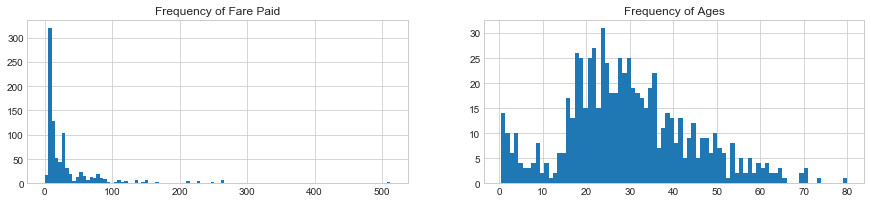

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize= (15,3))
ax1.hist(train_df['Fare'], bins=100)
ax1.set_title('Frequency of Fare Paid')
ax2.hist(train_df['Age'], bins=80)
ax2.set_title('Frequency of Ages')

These histograms tell us important insight about fare costs distribution and ages.

### Basic Data Analysis
In this part we will examine the relationship of some variables with survival. These pairs are:
+ Pclass - Survived
+ Sex - Survived
+ SibSp - Survived
+ Parch - Survived

In [12]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The higher class are the tickets, the higher rate of survival.

In [13]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Females survived __significantly__ higher than males.

In [14]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


__Alone people__ and __people with 1 or 2 companies__ survived much better than more crowded groups.

In [15]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


A similar observation can be made about __'Parch'__ variable. People with 1, 2 or 3 parents/children with them survived much better. Followed by solo travellers, and for crowded families chances drop __significantly__.

### Outliar Detection

Detecting outliars are very important. I will decide to drop a row __only if__ that row has __more than 2 outliar data points__ in terms of _'Age'_, _'Sibsp'_, _'Parch'_ and _'Fare'_ variables.
* I will write a function that gives me back an array of rows (passengers) with more than 2 outliars.
* Than I will drop these rows.

It will help me eliminate row with mutliple outliars, while not just dropping every row with outliar. 

In [16]:
def outlier_detect(df, features):
    outlier_indices = []
    
    for c in features:
        q1 = np.percentile(df[c],25)
        q3 = np.percentile(df[c],75)
        iqr = q3 - q1
        outlier_step = iqr*1.5
        outlier_list_col = df[((df[c] < q1-outlier_step) | (df[c] > q3+outlier_step))].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [17]:
g = outlier_detect(train_df, ['Age', 'SibSp', 'Parch', 'Fare'])
g

C:\Users\yigit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [19]:
# List g includes observations with more than 2 outlier values in stated numerical features.

train_df.loc[g]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [20]:
# drop outliers

train_df = train_df.drop(g).reset_index(drop=True)

### Missing Values

First we concatenate __test_df__ and __train_df__ dataframes.

In [21]:
train_df.shape, test_df.shape

((881, 12), (418, 11))

In [23]:
# original train data has 10 more rows, since we dropped outliar rows.
train.shape, test.shape

((891, 12), (418, 11))

In [26]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

There is no missing value in __'Survived'__ column. Its safe to move forward.

### Now we can concatenate

In [29]:
x1 = train_df.copy()
x2 = test_df.copy()
concat_df = pd.concat([x1, x2], axis=0).reset_index(drop=True)
concat_df.shape

C:\Users\yigit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


(1299, 12)

__Error is expected:__, 'Survived' column doesn't exist in test dataset.

### Continue with missing values

This will show which columnns include missing values.

In [30]:
concat_df.columns[concat_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype='object')

In [31]:
concat_df.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

* 418 missing 'Survived' data is normal, it is then lengh of test data.

### Filling Missing Values
+ Embarked has 2 missing value
+ Fare has only
##### We might prefer to fill them instead of losing data.

### 1. 'Embarked'

In [32]:
concat_df[concat_df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
60,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
821,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


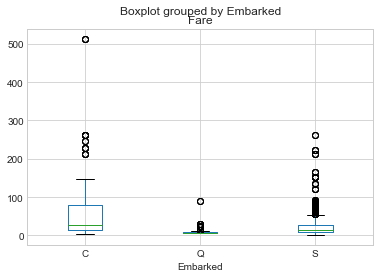

In [33]:
concat_df.boxplot(column='Fare', by = 'Embarked')
plt.show()

Boxplot of __'Fare' vs. 'Embarked'__ shows that, __according to the fare price__ they paid, they probably were embarked from port C.

,Embarked,Pclass,count
0,C,1,141
1,C,2,28
2,C,3,101
3,Q,1,3
4,Q,2,7
5,Q,3,113
6,S,1,174
7,S,2,242
8,S,3,488


In [40]:
# concat_df.groupby(['Embarked','Pclass']).size().reset_index(name='count')
# concat_df[['Embarked','Pclass']].groupby(['Embarked','Pclass']).size()
pd.DataFrame(concat_df.groupby(['Embarked','Pclass']).size())

0
Embarked Pclass     
C        1       141
         2        28
         3       101
Q        1         3
         2         7
         3       113
S        1       174
         2       242
         3       488

This groupby table supports our argument. __Q__ Embarked passengers are mostly 3rd class, __S__ is a bit mixed but mostly lower classes. But __C__ port is mostly 1st classes.
+ So, I decide to fill their NA values as __'C'__

In [41]:
concat_df['Embarked'] = concat_df['Embarked'].fillna('C')

In [42]:
concat_df[concat_df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


Now they are no more null values.

### 2. 'Fare'

In [43]:
concat_df[concat_df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1033,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [44]:
np.mean(concat_df[(concat_df['Pclass'] == 3) & (concat_df['Embarked'] == 'S')]['Fare'])

13.643220739219718

Passengers embarked from __port S__ and bought a ticket of __class__ 3 paid __13.64 on average__. So, I am going to fill it that way.

In [45]:
# assign variable to an object 'a'
a = np.mean(concat_df[(concat_df['Pclass'] == 3) & (concat_df['Embarked'] == 'S')]['Fare'])

# fill the NA value with a
concat_df['Fare'] = concat_df['Fare'].fillna(a)

# check if still any NA left.
concat_df[concat_df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


### 3. 'Age'

* Cutting out 256 data points is not a good solution in terms of performing a proper data analysis :)
* To guess passengers' ages ___in a reasonable manner___, we can make use of features __'Pclass', 'Sex', 'SibSp'__ and __'Parch'__ in a hybrit manner.

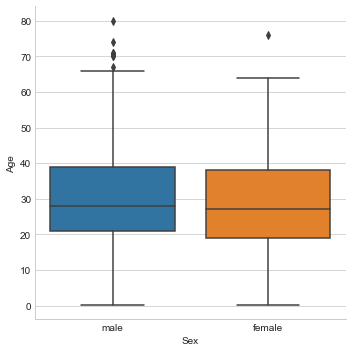

In [46]:
# concat_df[concat_df['Age'].isnull()].head()
sns.catplot(x='Sex', y='Age', data= concat_df, kind='box')
plt.show()

* The median and distribution of ages among genders are close, still there is some difference. Combined with other variables it might be more meaningful. 

In [49]:
concat_df[['Sex','Pclass', 'Age']].groupby(['Sex','Pclass']).median()

Age
Sex    Pclass      
female 1       36.0
       2       28.0
       3       22.0
male   1       42.0
       2       29.5
       3       25.0

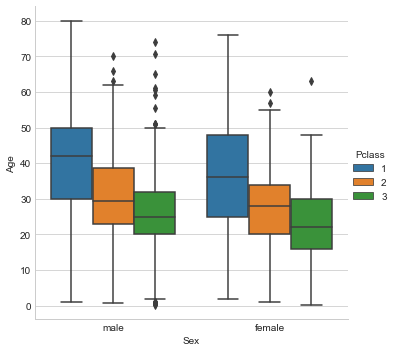

In [48]:
sns.catplot(x='Sex', y='Age', hue='Pclass', data= concat_df, kind='box')
plt.show()

* __'Sex'__ variable looks more meaningful when examined together with __'Pclass'__, which is definetely predictive about age.

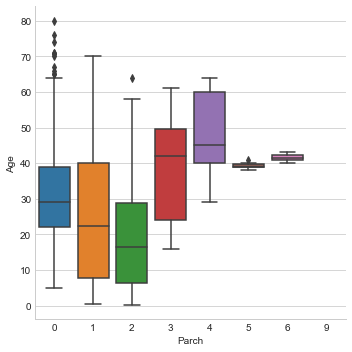

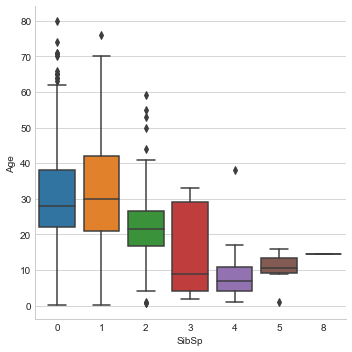

In [50]:
sns.catplot(x='Parch', y='Age', data= concat_df, kind='box')
sns.catplot(x='SibSp', y='Age', data= concat_df, kind='box')
plt.show()

In [51]:
concat_df['Sex'] = concat_df['Sex'].map({'male':0, 'female':1})
# Alternatively
# concat_df['Sex'] = [1 if i =='male' else 0 for i in concat_df['Sex']]

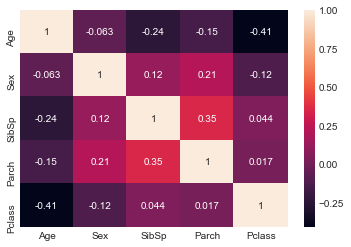

In [52]:
sns.heatmap(concat_df[['Age', 'Sex', 'SibSp', 'Parch', 'Pclass']].corr(), annot=True)
plt.show()

* Age isn't very significantly correlated with __'Sex'__ but correlated with __'Parch', 'SibSp' and 'Pclass'__. Still, I prefer to use __'Sex'__ variable since there is actually difference between age medians males and females in various groups. It will narrow down and help personalizing filling missing values.

#### Filling Values

* First: __index_nan_age__ is the list holding the index numbers of passengers with __missing age data__. 

* Second: For Loop generates __predicted ages list (age_pred)__ according to variables we selected as correlated enough. Then it assigns these _"possible"_ ages to NaN values.
  

In [53]:
index_nan_age = list(concat_df['Age'][concat_df['Age'].isnull()].index)

for i in index_nan_age:
    age_pred = concat_df['Age'][((concat_df['SibSp']==concat_df.iloc[i]['SibSp'])\
                                 &(concat_df['Parch']==concat_df.iloc[i]['Parch'])\
                                 &(concat_df['Pclass']==concat_df.iloc[i]['Pclass'])\
                                 &(concat_df['Sex']==concat_df.iloc[i]['Sex']))].median()
    
    if not np.isnan(age_pred):
        concat_df['Age'].iloc[i] = age_pred
    else:
        concat_df['Age'].iloc[i] = concat_df['Age'].median()

C:\Users\yigit\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
concat_df[concat_df['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


* All age values are filled.
* I could have not used 'Sex' feature for age prediction due to low correlation with age, but it actually makes sense.

In [55]:
concat_df.isnull().sum()

Age               0
Cabin          1007
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### Correlation Matrix before some feature analysis
Correlation between: SibSp -- Parch -- Age -- Fare -- Survived

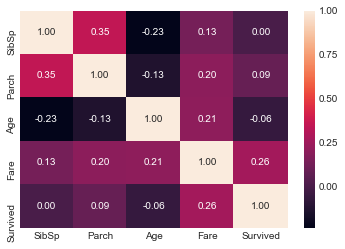

In [56]:
list1 = ['SibSp', 'Parch', 'Age', 'Fare', 'Survived']
sns.heatmap(concat_df[list1].corr(), annot=True, fmt = '0.2f')

Fare feature seems to be correlated with Survived feature with (0.26). But I will also keep examining other relationships.

### Feature Analysis: SibSP vs. Survived

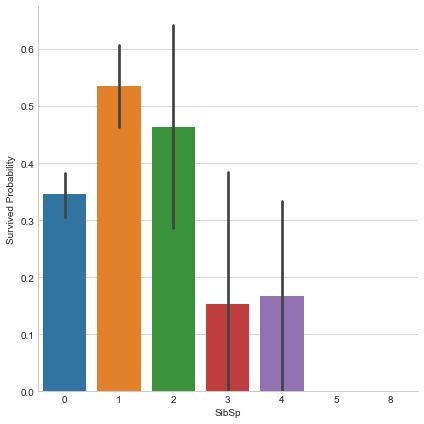

In [57]:
z = sns.catplot(x='SibSp', y='Survived', data=concat_df, kind='bar', height=6)
z.set_ylabels('Survived Probability')
plt.show()

* Having a lot of SibSp (Siblings or spouse) decreases survival chance significantly.
* If SibSp == 0 or 1 or 2; passanger has more chance to survive.
* We can consider a new feature describing these categories.

### Feature Analysis: Parch vs. Survived

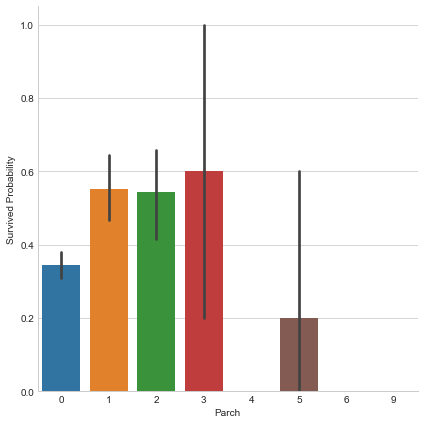

In [58]:
z = sns.catplot(x='Parch', y='Survived', data=concat_df, kind='bar', height=6)
z.set_ylabels('Survived Probability')
plt.show()

* People with "smaller families" with 1 or 2 Parch (parents or children) have more chance to survive. They are followed by solo travellers (parch = 0). 
* Standard deviation with parch = 3 is very significant.
* SibSp and Parch can be used for new feature extraction with treshold = 3 (<3)

### Feature Analysis: Pclass vs. Survived

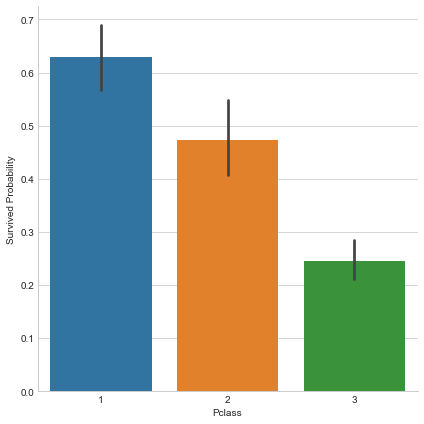

In [59]:
z = sns.catplot(x='Pclass', y='Survived', data=concat_df, kind='bar', height=6)
z.set_ylabels('Survived Probability')
plt.show()

* Pclass is a great feature to train a classification model.
* Relation with ticket class and survival rate is __obvious__.

### Feature Analysis: Age vs. Survived

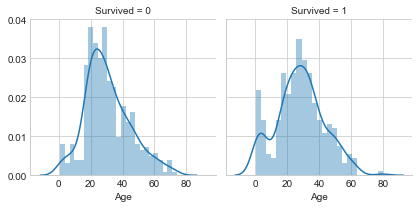

In [60]:
z = sns.FacetGrid(train_df,  col='Survived')
z.map(sns.distplot, 'Age', bins=25)
plt.show()

* Age <= 10 has a high survival rate
* Oldest passengers around 80 y.o. survived
* Peak of non-survivals is around 25
* Peak of survivals is around 30
* Most passengers are in range 15-35
* Age feature can be used for training model
* Age feature can be used to fill missing age values

### Feature Analysis: Pclass vs. Age vs. Survived

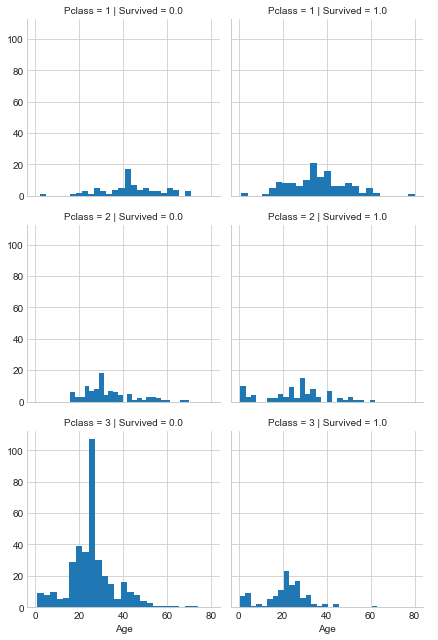

In [61]:
z = sns.FacetGrid(concat_df, col='Survived', row='Pclass', height=3)
z.map(plt.hist, 'Age', bins=25)
z.add_legend()
plt.show()

* Again we can see that in case Pclass=3, majority couldn't survive. It is reverse for Pclass=1.

### Feature Analysis: Embarked vs. Sex vs. Pclass vs. Survived

C:\Users\yigit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\yigit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


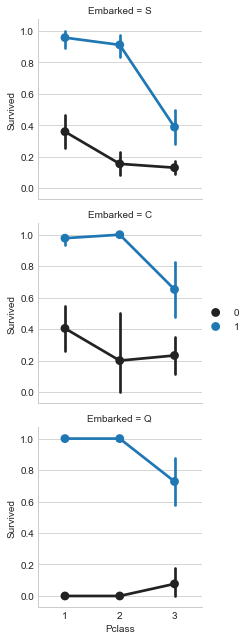

In [62]:
z = sns.FacetGrid(concat_df, row='Embarked', height=3)
z.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
z.add_legend()
plt.show()

* Female have higher survival rate than men in general.
* Males embarked from port C survived with a higher rate in comparison to other ports. -the ones paid more money on average-
* Each graph show us a different relation between variables.
* Combined with previous graphical analysis done, this plot tells us many things.
* Features 'Embarked' and 'Sex' will be used when training model.

### Feature Analysis: Embarked vs. Sex vs. Pclass vs. Survived

C:\Users\yigit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


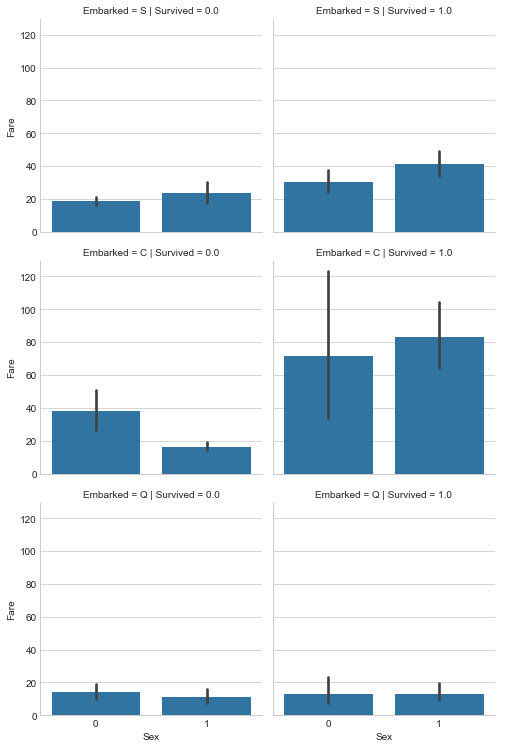

In [63]:
z = sns.FacetGrid(concat_df, row='Embarked', col='Survived', height=3.5)
z.map(sns.barplot, 'Sex', 'Fare')
z.add_legend()
plt.show()

* Passenger paid higher fare, had better chance of survival.
* Fare can be used as a categorical variable in training model.

### Feature Engineering
#### 1. Name --> Title

In [65]:
concat_df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

* Obviously people had titles, which can be useful  for analysis.
* Splitting by __dots__ would be a nice first step for extracting titles.

In [66]:
# Quick remembering .split()
s = 'Braund, Mr. Owen Harris'
s.split('.')[0] 

'Braund, Mr'

In [68]:
# Quick remembering .split()
s.split('.')[0].split(',')[-1]   # -1 or 1 same in this case

' Mr'

In [69]:
# Quick remembering .split()
s.split('.')[0].split(',')[-1].strip()

'Mr'

In [70]:
name = concat_df['Name']
concat_df['Title'] = [t.split('.')[0].split(',')[-1].strip() for t in name]

In [71]:
concat_df['Title'].sample(15)

717       Mr
603      Mrs
1092      Mr
402     Miss
252     Miss
886       Mr
288     Miss
767      Mrs
269     Miss
1007      Mr
579       Mr
615       Mr
1088      Mr
85        Mr
979     Miss
Name: Title, dtype: object

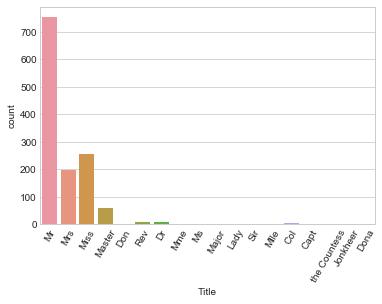

In [72]:
sns.countplot(x='Title', data=concat_df)
plt.xticks(rotation = 60)
plt.show()

In [73]:
concat_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

* countplot above gives ideas about how this newly generated __'Title'__ variable can be categorized.

In [76]:
concat_df['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Dona              1
Mme               1
Don               1
Capt              1
Jonkheer          1
Lady              1
Sir               1
the Countess      1
Name: Title, dtype: int64

* Some titles occur only 1 or a few times, which does not mean much statistically.
* I will group all the titles except __Mr, Mrs, Miss, Master__ as __'Special Titled'__, due to their potential statistical insignificancy.
* __NOTE:__ having both gender column and still using Mr, Mrs or Miss titles may have (or not) effects on prediction.

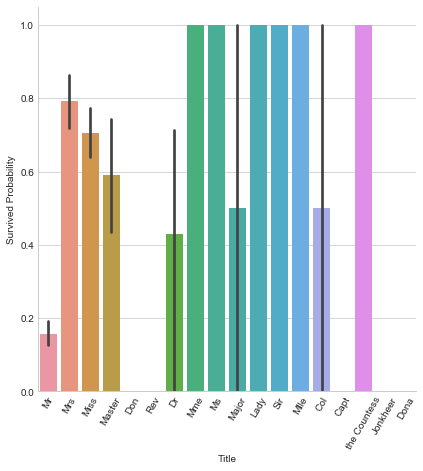

In [75]:
z = sns.catplot(x='Title', y='Survived', data=concat_df, kind='bar', height=6)
plt.xticks(rotation = 60)
z.set_ylabels('Survived Probability')
plt.show()

In [78]:
# Convert to Categorical
concat_df['Title'] = concat_df['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Mlle', 'Ms'
       'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], 'Special Titled')

# or simply convert to numeric format
concat_df['Title'] = [0 if i=='Master' else 1 if i=='Miss' else 2 if i=='Mrs' else 3 if i=='Mr' else 4 for i in concat_df['Title']]
concat_df['Title'].head(10)

0    3
1    2
2    1
3    2
4    3
5    3
6    3
7    0
8    2
9    2
Name: Title, dtype: int64

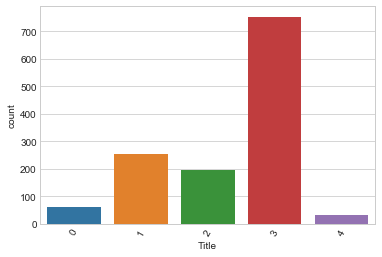

In [79]:
sns.countplot(x='Title', data=concat_df)
plt.xticks(rotation = 60)
plt.show()

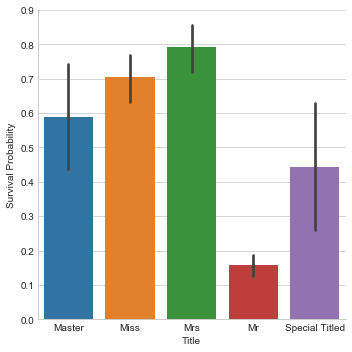

In [80]:
g = sns.catplot(x='Title', y='Survived', data=concat_df, kind='bar')
g.set_xticklabels(['Master', 'Miss', 'Mrs', 'Mr', 'Special Titled'])
g.set_ylabels('Survival Probability')
plt.show()

In [81]:
concat_df.drop(['Name'], axis=1, inplace=True)
# concat_df.drop(labels = ['Name'], axis=1, inplace=True)

In [82]:
concat_df = pd.get_dummies(concat_df, columns=['Title'], drop_first=True)
concat_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_1,Title_2,Title_3,Title_4
0,22.0,NaN,S,7.2500,0,1,3,0,1,0.0,A/5 21171,0,0,1,0
1,38.0,C85,C,71.2833,0,2,1,1,1,1.0,PC 17599,0,1,0,0
2,26.0,NaN,S,7.9250,0,3,3,1,0,1.0,STON/O2. 3101282,1,0,0,0
3,35.0,C123,S,53.1000,0,4,1,1,1,1.0,113803,0,1,0,0
4,35.0,NaN,S,8.0500,0,5,3,0,0,0.0,373450,0,0,1,0


### Feature Engineering
#### 2. Family Size

In [129]:
concat_df['Fsize'] = concat_df['Parch'] + concat_df['SibSp'] + 1

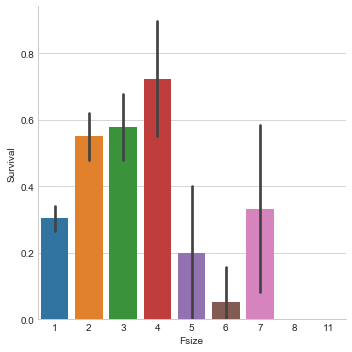

In [130]:
g = sns.catplot(x='Fsize', y='Survived', data=concat_df, kind='bar')
g.set_ylabels('Survival')
plt.show()

In [132]:
concat_df['Family_Size'] = [1 if i<5 else 0 for i in concat_df['Fsize']]
#concat_df.head(8)

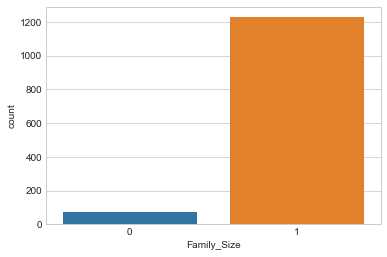

In [133]:
sns.countplot(x='Family_Size', data=concat_df)
plt.show()

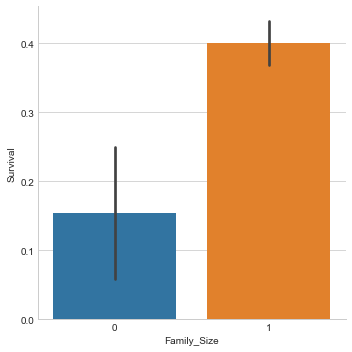

In [134]:
g = sns.catplot(x='Family_Size', y='Survived', data=concat_df, kind='bar')
g.set_ylabels('Survival')
plt.show()

* Small Families have better survival rate than larger families

In [138]:
concat_df.drop(['SibSp','Parch','Fsize'], axis=1, inplace=True)
concat_df.columns

Index(['Age', 'Embarked', 'Fare', 'Survived', 'Title_1', 'Title_2', 'Title_3',
       'Title_4', 'T_A5', 'T_CA', 'T_PC', 'T_SCPARIS', 'T_SOTONOQ', 'T_STONO',
       'T_WC', 'T_x', 'Pclass_2', 'Pclass_3', 'Sex_1', 'Family_Size'],
      dtype='object')

### Feature Engineering
##### 3. Embarked

In [143]:
concat_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

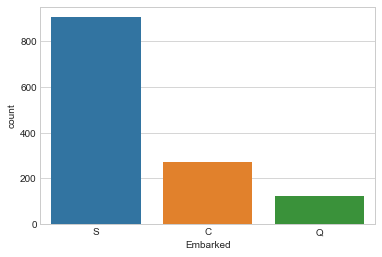

In [144]:
sns.countplot(x='Embarked', data=concat_df)
plt.show()

In [147]:
concat_df = pd.get_dummies(concat_df, columns=['Embarked'])
concat_df.drop(['Embarked_Q'], axis=1, inplace=True)
concat_df.head()

,Age,Fare,Survived,Title_1,Title_2,Title_3,Title_4,T_A5,T_CA,T_PC,...,T_SOTONOQ,T_STONO,T_WC,T_x,Pclass_2,Pclass_3,Sex_1,Family_Size,Embarked_C,Embarked_S
0,-0.551238,-0.499513,0.0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0.650726,0.764510,1.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
2,-0.250747,-0.486188,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,1
3,0.425358,0.405570,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
4,0.425358,-0.483721,0.0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1


### Feature Engineering
##### 4. Ticket

In [84]:
a ='A/5 21171'
a.replace('.','').replace('/','').strip().split(' ')[0]

'A5'

In [114]:
tickets = []
for i in list(concat_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace('.','').replace('/','').strip().split(' ')[0])
    else:
        tickets.append('x')

concat_df['Tickets'] = tickets
#concat_df['Tickets'].head(12)

In [115]:
concat_df['Tickets'].value_counts()
#g = sns.catplot(x='Tickets', y='Survived', data=concat_df, kind='bar')
#g.set_ylabels('Survival')
#plt.show()

x          954
PC          92
CA          61
A5          28
SOTONOQ     24
WC          15
SCPARIS     14
STONO       14
A4          10
FCC          9
SOC          8
C            8
SOPP         7
STONO2       7
SCParis      5
SCAH         5
LINE         4
WEP          4
PP           4
FC           3
SOTONO2      3
SCA4         2
PPP          2
SC           2
SWPP         2
AS           1
AQ3          1
AQ4          1
SOP          1
A            1
SP           1
SCA3         1
CASOTON      1
STONOQ       1
LP           1
Fa           1
SCOW         1
Name: Tickets, dtype: int64

* This is probably the __worst variable ever__, it is probably going to be a mistake to include this variable in the model. SO, I will save a copy of dataset and compare results with and without it.

In [116]:
concat_df['Tickets'] = concat_df['Tickets'].replace(['FCC', 'SOC', 'C', 'SOPP', 'STONO2', 'SCParis', 'SCAH','LINE', 'WEP',
                                                 'PP', 'FC', 'SOTONO2', 'SCAH4','PPP','SC','SWPP','AS','AQ3','AQ3','SOP',
                                                'A','SP','SCA3','CASOTON','STONOQ','LP','Fa','SCOW','SCA4','AQ4','A4'], 'x')

concat_df['Tickets'].value_counts()

x          1051
PC           92
CA           61
A5           28
SOTONOQ      24
WC           15
SCPARIS      14
STONO        14
Name: Tickets, dtype: int64

In [117]:
saved_copy = concat_df.copy()

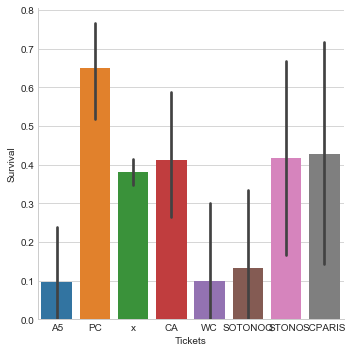

In [118]:
g = sns.catplot(x='Tickets', y='Survived', data=concat_df, kind='bar')
g.set_ylabels('Survival')
plt.show()

In [119]:
concat_df = pd.get_dummies(concat_df, columns=['Tickets'] ,prefix='T')
concat_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,...,Title_3,Title_4,T_A5,T_CA,T_PC,T_SCPARIS,T_SOTONOQ,T_STONO,T_WC,T_x
0,22.0,NaN,S,7.2500,0,1,3,0,1,0.0,...,1,0,1,0,0,0,0,0,0,0
1,38.0,C85,C,71.2833,0,2,1,1,1,1.0,...,0,0,0,0,1,0,0,0,0,0
2,26.0,NaN,S,7.9250,0,3,3,1,0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,C123,S,53.1000,0,4,1,1,1,1.0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,NaN,S,8.0500,0,5,3,0,0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [120]:
concat_df.drop(['Ticket'], axis=1, inplace=True)

In [ ]:
a = concat_df[['Tickets','Survived']].groupby(['Tickets']).mean().sort_values(by='Survived')
b = pd.DataFrame(concat_df['Tickets'].value_counts())
a['Tickets']=a.index
b.rename(columns={"Tickets": "Count"}, inplace=True)
b['Tickets']=b.index
#a.merge(b)

a.index.name = ''
#b =b.sort_values(by='Tickets')
#a =a.sort_values(by='Tickets')
c = b.merge(a)
d = c[c['Count']>10]

In [201]:
#g = sns.catplot(x='Tickets', y='Survived', data=d, kind='bar')
#g.set_ylabels('Survival')
#plt.show()

### Feature Engineering
#### 5. Pclass

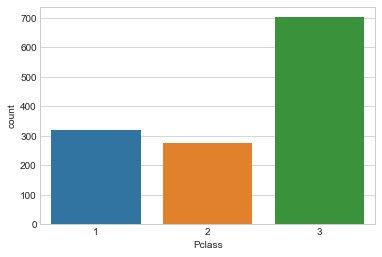

In [121]:
sns.countplot(x='Pclass', data=concat_df)
plt.show()

In [122]:
concat_df['Pclass'] = concat_df['Pclass'].astype('category')
concat_df = pd.get_dummies(concat_df, columns=['Pclass'], drop_first=True)
concat_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Sex,SibSp,Survived,Title_1,...,T_A5,T_CA,T_PC,T_SCPARIS,T_SOTONOQ,T_STONO,T_WC,T_x,Pclass_2,Pclass_3
0,22.0,NaN,S,7.2500,0,1,0,1,0.0,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,C85,C,71.2833,0,2,1,1,1.0,0,...,0,0,1,0,0,0,0,0,0,0
2,26.0,NaN,S,7.9250,0,3,1,0,1.0,1,...,0,0,0,0,0,0,0,1,0,1
3,35.0,C123,S,53.1000,0,4,1,1,1.0,0,...,0,0,0,0,0,0,0,1,0,0
4,35.0,NaN,S,8.0500,0,5,0,0,0.0,0,...,0,0,0,0,0,0,0,1,0,1


### Feature Engineering 3
#### 6. Sex

In [123]:
#concat_df.info()
type(concat_df.Sex)

pandas.core.series.Series

In [124]:
concat_df['Sex'] = concat_df['Sex'].astype('category')
concat_df = pd.get_dummies(concat_df, columns=['Sex'], drop_first=True)
concat_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,SibSp,Survived,Title_1,Title_2,...,T_CA,T_PC,T_SCPARIS,T_SOTONOQ,T_STONO,T_WC,T_x,Pclass_2,Pclass_3,Sex_1
0,22.0,NaN,S,7.2500,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,38.0,C85,C,71.2833,0,2,1,1.0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,26.0,NaN,S,7.9250,0,3,0,1.0,1,0,...,0,0,0,0,0,0,1,0,1,1
3,35.0,C123,S,53.1000,0,4,1,1.0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,35.0,NaN,S,8.0500,0,5,0,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0


### cabin and passenger id

In [149]:
concat_df.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 21 columns):
Age            1299 non-null float64
Fare           1299 non-null float64
Survived       881 non-null float64
Title_1        1299 non-null uint8
Title_2        1299 non-null uint8
Title_3        1299 non-null uint8
Title_4        1299 non-null uint8
T_A5           1299 non-null uint8
T_CA           1299 non-null uint8
T_PC           1299 non-null uint8
T_SCPARIS      1299 non-null uint8
T_SOTONOQ      1299 non-null uint8
T_STONO        1299 non-null uint8
T_WC           1299 non-null uint8
T_x            1299 non-null uint8
Pclass_2       1299 non-null uint8
Pclass_3       1299 non-null uint8
Sex_1          1299 non-null uint8
Family_Size    1299 non-null int64
Embarked_C     1299 non-null uint8
Embarked_S     1299 non-null uint8
dtypes: float64(3), int64(1), uint8(17)
memory usage: 62.2 KB


### Scale 'Age' and 'Fare'

In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(concat_df[['Age','Fare']])
x_scaled = scaler.transform(concat_df[['Age','Fare']])
scaled_df = pd.DataFrame(x_scaled)

concat_df['Age'] = scaled_df[0]
concat_df['Fare'] = scaled_df[1]
concat_df.head()

,Age,Embarked,Fare,Survived,Title_1,Title_2,Title_3,Title_4,T_A5,T_CA,T_PC,T_SCPARIS,T_SOTONOQ,T_STONO,T_WC,T_x,Pclass_2,Pclass_3,Sex_1,Family_Size
0,-0.551238,S,-0.499513,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
1,0.650726,C,0.764510,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1
2,-0.250747,S,-0.486188,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
3,0.425358,S,0.405570,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,0.425358,S,-0.483721,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1


### Importing Relevant Models and Libraries before starting Data Analysis

In [150]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Train Test Split

In [151]:
train_df.shape[0], test_df.shape[0], concat_df.shape[0]

(881, 418, 1299)

In [152]:
test_data_new = concat_df[881:]
test_data_new.isnull().sum(), test_data_new.shape

(Age              0
 Fare             0
 Survived       418
 Title_1          0
 Title_2          0
 Title_3          0
 Title_4          0
 T_A5             0
 T_CA             0
 T_PC             0
 T_SCPARIS        0
 T_SOTONOQ        0
 T_STONO          0
 T_WC             0
 T_x              0
 Pclass_2         0
 Pclass_3         0
 Sex_1            0
 Family_Size      0
 Embarked_C       0
 Embarked_S       0
 dtype: int64, (418, 21))

In [153]:
test_data_new.drop(['Survived'], axis=1, inplace=True)

C:\Users\yigit\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [174]:
train_data_new = concat_df[:881]
x_train = train_data_new.drop(['Survived'], axis=1)
y_train = train_data_new['Survived']
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42) 

print('x_train: {}\nx_test (first validation): {}\ny_train: {}\ny_test (first validation): {}\ntrain_total: {}\nx_test (Final Validation): {}'
      .format(len(x_train), len(x_test), len(y_train), len(y_test),len(train_data_new), len(test_data_new)))

x_train: 616
x_test (first validation): 265
y_train: 616
y_test (first validation): 265
train_total: 881
x_test (Final Validation): 418


### Simple Logistic Regression Model

In [175]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2)
acc_log_test = round(logreg.score(x_test, y_test)*100,2)

print('Training Accuracy: {}\nTest Accuracy: {}'.format(acc_log_train, acc_log_test))

Training Accuracy: 83.28
Test Accuracy: 83.4


C:\Users\yigit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Hyperparameter Tuning
##### Grid Search - Cross Validation
* We will compare 5 Machine Learning Classifier and evaluate mean accuracies of each by Stratified CV.
* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regresssion

In [176]:
rs= 42
classifier = [DecisionTreeClassifier(random_state=rs),
             SVM(random_state=rs),
             RandomForestClassifier(random_state= rs),
             LogisticRegression(random_state= rs),
             KNeighborsClassifier()]

dt_param_grid = {'min_samples_split': range(10, 500, 20),
                'max_depth': range(1, 20 ,2)}

s = {'kernel': ['rbf'],
                 'gamma': [0.001, 0.01, 0.1, 1],
                 'C': [1, 10, 50, 100, 200, 300, 1000]}

rf_param_grid = {'max_features': [1,3,10],
                'min_samples_split': [2, 3, 10],
                'min_samples_leaf': [1, 3, 10],
                'bootstrap': [False],
                'n_estimators': [100, 300],
                'criterion': ['gini']}

logreg_param_grid = {'C': np.logspace(-3, 3, 7),
                    'penalty': ['l1','l2']}

knn_param_grid = {'n_neighbors': np.linspace(1, 19, 10, dtype=int).tolist(),
                 'weights': ['uniform','distance'],
                 'metric': ['euclidean', 'manhattan']}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [177]:
cv_result =  []
best_estimators = []

for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv=StratifiedKFold(n_splits=10),
                       scoring ='accuracy',
                       n_jobs = -1,
                       verbose = 1)
    clf.fit(x_train, y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    5.6s finished
C:\Users\yigit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8409090909090909
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    4.5s finished
C:\Users\yigit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8506493506493507
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   50.6s finished
C:\Users\yigit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8506493506493507
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.9s finished
C:\Users\yigit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yigit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.823051948051948
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.4s


0.8327922077922078


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.6s finished
C:\Users\yigit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'CV Scores')

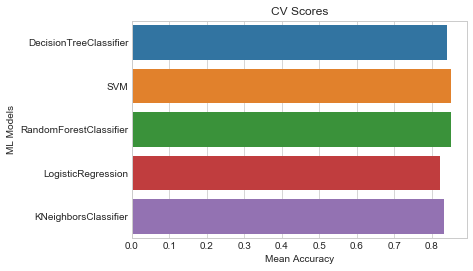

In [178]:
cv_rez = pd.DataFrame({'Cross Val. Means': cv_result, 'ML Models': ['DecisionTreeClassifier',
             'SVM',
             'RandomForestClassifier',
             'LogisticRegression',
             'KNeighborsClassifier']})

g = sns.barplot('Cross Val. Means', 'ML Models', data = cv_rez)
g.set_xlabel('Mean Accuracy')
g.set_title('CV Scores')


* Accroding to results above, I choose 3 highest scored algorithms: Random Forest, SVM and Decision Tree classifiers for my ensemble model.

### Ensemble Model

In [182]:

VotingC = VotingClassifier(estimators = [('dt', best_estimators[0]),
                                        ('rfc', best_estimators[2]),
                                        ('svm', best_estimators[1])],
                                        voting = 'hard', n_jobs = -1)

VotingC = VotingC.fit(x_train, y_train)
print(accuracy_score(VotingC.predict(x_test), y_test))

0.8113207547169812


### Predict with Test Data

In [186]:
test_survived = pd.Series(VotingC.predict(test_data_new), name='Survived').astype(int)
rezults = pd.concat([test_passangerId, test_survived], axis=1)
rezults.to_csv('titanic2.csv', index=False)

In [187]:
f = pd.read_csv('titanic2.csv')
f.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


* Düzeltmeler

My score on kaggle __(check this link: https://www.kaggle.com/c/titanic)__ is __0.77511__ according to analysis I made. You can aslo try and upload your score in a new created csv file.